## 3.0 Atlantic Articles Sentiment Analysis

In this notebook the Atantic dataset is further explored through sentiment analysis. The analysis focuses on the tone (subjectivity and objectivity) of articles with respect to article topics and the most prolific authors.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from textblob import TextBlob

In [2]:
df = pd.read_pickle('data/atlantic_data.pkl')

In [3]:
df.head()

In [4]:
df.shape

In [5]:
df.info()

We shall add two columns to the DataFrame for sentiment analysis:

In [6]:
polarity_function = lambda x: TextBlob(x).sentiment.polarity
subjectivity_function = lambda x: TextBlob(x).sentiment.subjectivity

In [7]:
df['polarity'] = df['cleaned_text'].apply(polarity_function)
df['subjectivity'] = df['cleaned_text'].apply(subjectivity_function)

In [8]:
df.to_pickle('atlantic_sentiment.pkl')

In [3]:
df = pd.read_pickle('atlantic_sentiment.pkl')
df.shape

(29931, 13)

In [4]:
df.head()

,date,category,title,subtitle,author,author_bio,text,url,time_scraped,year,cleaned_text,polarity,subjectivity
0,2016-04-01,Daily,"The Atlantic Daily: March Jobs Report, Chicago...","The U.S. economy adds a modest 215,000 jobs, t...",Matt Ford and Rosa Inocencio Smith,Matt Ford is a former associate editor at The ...,What We’re Following: Marching Toward JobsThe...,https://www.theatlantic.com/newsletters/archiv...,2020-09-29 18:43:20.697674,2016,follow march toward jobsth economi ad modest j...,0.093142,0.323539
1,2016-04-01,Politics Daily,The Edge: In Like a Lion and Out With Jobs,NaN,Elaine Godfrey,Elaine Godfrey is a staff writer at The Atlant...,Today in One ParagraphPresident Obama advised...,https://www.theatlantic.com/politics/archive/2...,2020-09-29 18:43:37.002516,2016,today one paragraphpresid obama advis world le...,0.169487,0.444971
2,2016-04-01,Global,Hacking Elections in Latin America and Rapping...,The highlights from seven days of reading abou...,Jillian Kumagai,Jillian Kumagai is a former editorial fellow a...,The French Connection\r\nWilliam McCants and ...,https://www.theatlantic.com/international/arch...,2020-09-29 18:43:44.801143,2016,french connect william mccant christoph mesero...,0.112641,0.323943
3,2016-04-01,Politics,Bernie in the Bronx,Can Sanders stun Hillary Clinton in the state ...,Russell Berman,Russell Berman is a staff writer at The Atlant...,"BRONX, New York—Mercer Jabul sat quietly at t...",https://www.theatlantic.com/politics/archive/2...,2020-09-29 18:43:52.166631,2016,bronx new jabul sat quietli veri top hill mari...,0.106741,0.385047
4,2016-04-01,Global,Pitching Global Stories: A Freelancer’s Guide,"Send us your smart, original stories about wha...",The Editors,NaN,The Atlantic’s global coverage is driven by c...,https://www.theatlantic.com/international/arch...,2020-09-29 18:44:00.005706,2016,atlant global coverag driven curios world forc...,0.083657,0.294429


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29931 entries, 0 to 29989
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          29931 non-null  datetime64[ns]
 1   category      29465 non-null  object        
 2   title         29931 non-null  object        
 3   subtitle      29891 non-null  object        
 4   author        29671 non-null  object        
 5   author_bio    29429 non-null  object        
 6   text          29931 non-null  object        
 7   url           29931 non-null  object        
 8   time_scraped  29931 non-null  datetime64[ns]
 9   year          29931 non-null  int64         
 10  cleaned_text  29931 non-null  object        
 11  polarity      29931 non-null  float64       
 12  subjectivity  29931 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(8)
memory usage: 3.2+ MB


### Sentiment Analysis of Top Contributing Authors in the Atlantic

The goal of this modeling will be to look into the top 10 authors of the Atlantic in the last 4 years. That is, the authors who have contributed the most to the blog articles published on the Atlantic site between 2016 and 2020. Each of these authors have contributed at least 500 articles during that time.

Some interesting things to consider, would be:

What is a general score of polarity and subjectivity for each writer, and how does it compare to the overall sentiment of the Atlantic (which could be represented as an average of the sentiment scores across all authors)?

Does the sentiment of the authors change over time? If so, how? And what factors might contribute to this? (For example, is there any noticeable change since coronavirus?)


In [6]:
df['author'].value_counts()[50:100]

Kathy Gilsinan                                   123
Alia Wong                                        120
Matt Peterson                                    117
Elaine Godfrey and Candice Norwood               116
Ashley Fetters                                   115
Michelle Cottle                                  111
Natasha Bertrand                                 110
Christopher Orr                                  107
Nora Kelly Lee                                   105
Elaina Plott                                     103
Kevin Townsend                                   102
Rachel Donadio                                   102
Caroline Kitchener                                99
Rosie Gray                                        97
McKay Coppins                                     95
Taylor Lorenz                                     92
Peter Nicholas                                    89
Robert O'Connell                                  87
Emily DeRuy                                   

Now we know who the top authors are, we can create a seperate DataFrame (df_authors) for those authors.

In [7]:
top_authors_dict = dict(df['author'].value_counts()[:10])
top_authors = list(top_authors_dict.keys())
df_authors = df[df['author'].isin(top_authors) == 1]
df_authors.shape

(7024, 13)

In [8]:
df_authors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7024 entries, 1 to 29985
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          7024 non-null   datetime64[ns]
 1   category      6986 non-null   object        
 2   title         7024 non-null   object        
 3   subtitle      6991 non-null   object        
 4   author        7024 non-null   object        
 5   author_bio    7024 non-null   object        
 6   text          7024 non-null   object        
 7   url           7024 non-null   object        
 8   time_scraped  7024 non-null   datetime64[ns]
 9   year          7024 non-null   int64         
 10  cleaned_text  7024 non-null   object        
 11  polarity      7024 non-null   float64       
 12  subjectivity  7024 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(8)
memory usage: 768.2+ KB


In [9]:
df_authors.describe()

,year,polarity,subjectivity
count,7024.000000,7024.000000,7024.000000
mean,2017.487756,0.075565,0.381120
std,1.199634,0.073754,0.072845
min,2016.000000,-0.511105,0.047619
25%,2017.000000,0.030654,0.337152
50%,2017.000000,0.072256,0.384840
75%,2018.000000,0.118029,0.428784
max,2020.000000,0.564706,0.785795


#### Overall trends by author

First we will examine the overall sentiment by author, along with the number of articles published by each.

In [10]:
df_sp = df_authors.groupby('author')[['polarity', 'subjectivity']].mean().reset_index()
df_sp['articles'] = df_authors.groupby('author')['title'].count().values
df_sp.sort_values('polarity')

,author,polarity,subjectivity,articles
5,Krishnadev Calamur,0.036697,0.322632,777
3,Ed Yong,0.047351,0.387874,571
6,Marina Koren,0.056894,0.365787,577
7,Rosa Inocencio Smith,0.077414,0.362121,529
1,David A. Graham,0.078709,0.381930,1168
2,David Sims,0.080084,0.412833,899
0,Conor Friedersdorf,0.082612,0.387998,678
8,Russell Berman,0.096705,0.381275,610
9,Spencer Kornhaber,0.098320,0.430887,629
4,Elaine Godfrey,0.103522,0.372538,586


Now we plot:

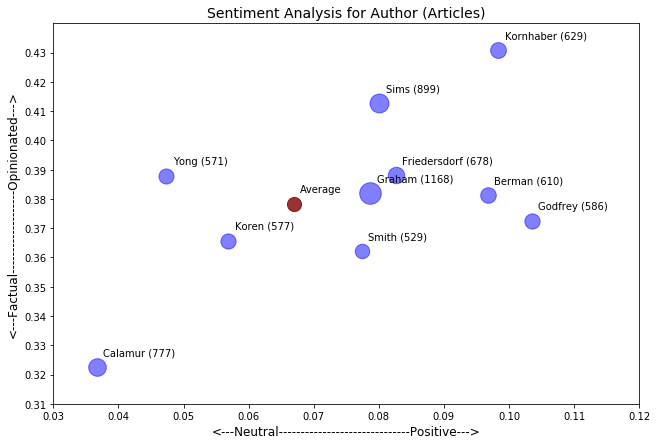

In [11]:
figure = plt.gcf()
size = figure.get_size_inches()
figure.set_size_inches(size * 1.75)

for row in df_sp.index:
    x = df_sp.iloc[[row]]['polarity']
    y = df_sp.iloc[[row]]['subjectivity']
    plt.scatter(x, y, color='blue', s=df_sp.iloc[[row]]['articles'].values[0] * 0.4, alpha=0.5)
    plt.text(x + 0.001, y + 0.004, '{} ({})'.format(df_sp['author'][row].split()[-1], 
                                                    df_sp.iloc[[row]]['articles'].values[0]), fontsize=10)
    
    plt.xlim(0.03, 0.12)
    plt.ylim(0.31, 0.44)
    plt.yticks((np.arange(31, 44) * 0.01))
    
    plt.title('Sentiment Analysis for Author (Articles)', fontsize=14)
    plt.xlabel('<---Neutral------------------------------Positive--->', fontsize=12)
    plt.ylabel('<---Factual-------------------Opinionated--->', fontsize=12)

plt.scatter(df['polarity'].mean(), df['subjectivity'].mean(), color='maroon', s=200, alpha=0.8)
plt.text(df['polarity'].mean() + 0.001, df['subjectivity'].mean() + 0.004, 'Average', fontsize=10)
plt.show()

From the scatterplot above, we can see that all 10 of the most prolific writers in the last 4 years have a positivity score above 0.05, and a subjectivity score around 0.4, which means that they are reporting mostly factual information and tend to write with a positive tone. Also, there seems to be a slight correlation between how positive the authors are and how opinionated they tend to be.

This makes me wonder if there is a corellation in general between the positivity and subjectivity of articles. Taking a look at the scores of individual articles from the most prolific writers:

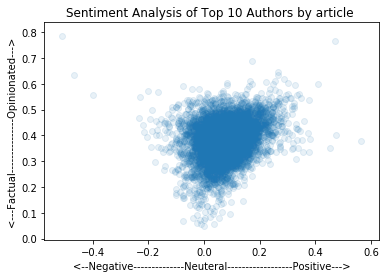

In [12]:
plt.scatter(df_authors['polarity'], df_authors['subjectivity'], alpha=0.1)
plt.title('Sentiment Analysis of Top 10 Authors by article ')
plt.xlabel('<--Negative--------------Neuteral------------------Positive--->')
plt.ylabel('<---Factual---------------Opinionated--->')
plt.show()

In [13]:
np.corrcoef(df_authors['polarity'], df_authors['subjectivity'])

array([[1.        , 0.25865724],
       [0.25865724, 1.        ]])

It's more or less a cloud, but there does seem to be a slight correlation between positivity and subjectivity, or more specifically, the more factual articles tend to be more neuteral in tone, which makes sense. Also, there are more positive articles than negative articles, and the very negative or very positive articles tend to be on the more opinionated end.

I'm interested in what those particularly negative outliers are...

In [14]:
df_negative = df_authors[df_authors['polarity'] < -0.15]
df_negative['author'].value_counts()

Krishnadev Calamur    19
Marina Koren           3
Conor Friedersdorf     1
Name: author, dtype: int64

Well, it looks like Calamur is responsible for most of the more negative articles, which explain why his overall tone comes to the most neuteral in the sentiment analysis of the authors.

Perhaps it would be helpful to look at the range of polarity and subjectivity displayed by each author.

Sentiment Analysis for Authors (ploarity, subjectivity):


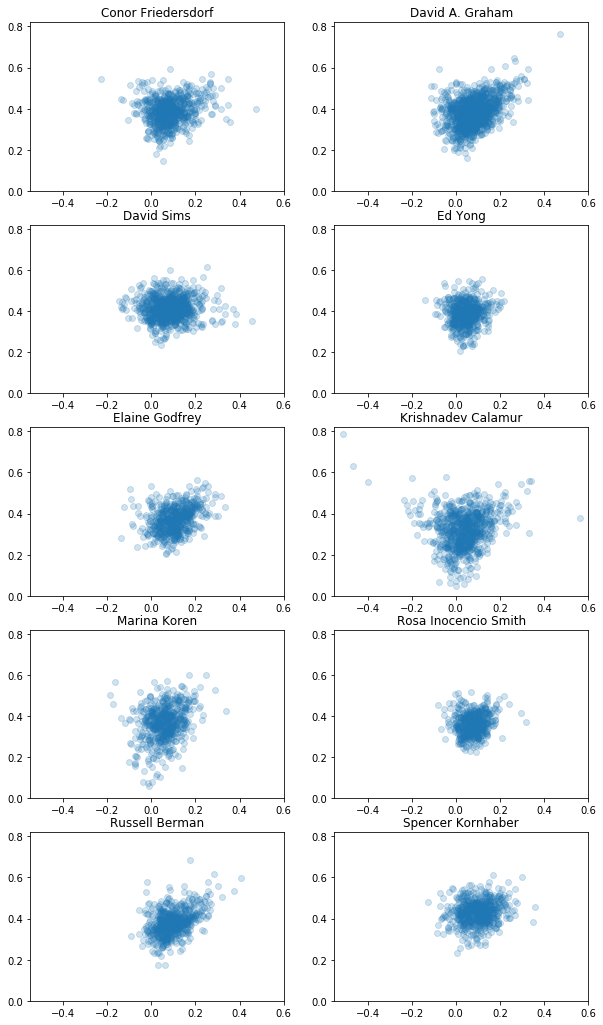

In [15]:
print('Sentiment Analysis for Authors (ploarity, subjectivity):')
authors = ['Conor Friedersdorf', 'David A. Graham', 'David Sims', 'Ed Yong', 'Elaine Godfrey',
           'Krishnadev Calamur', 'Marina Koren', 'Rosa Inocencio Smith', 'Russell Berman', 
           'Spencer Kornhaber']

plt.rcParams['figure.figsize'] = [10, 18]

n = 1
for author in authors:
    plt.subplot(5, 2, n)
    df_author = df_authors[df_authors['author'] == author]
    plt.scatter(df_author['polarity'], df_author['subjectivity'], alpha=0.2)
    plt.title(author)
    plt.xlim(-0.55, 0.6)
    plt.ylim(0, 0.82)
    n += 1
    
plt.show()

Yong, Smith, and Kornhaber tend to be more consistent in their writing tone, it seems.

Meanwhile, Calamur seems the most inconsistent, which is interesting, given his tone appeared to be the most neuteral and factual overall at the first glance.

### Sentiment Analysis by Topic

On another note, I wonder how sentiment in different categories compares...

In [16]:
df_cat = df.groupby('category')['polarity', 'subjectivity'].mean().sort_values(['polarity', 'subjectivity'], ascending=[False, False]).reset_index()
df_cat.head(), df_cat.tail()

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


(                                    category  polarity  subjectivity
 0  The Oscars: Awards, Nominations, and More  0.282917      0.380972
 1                              Editor’s Note  0.201733      0.426619
 2                                    Puzzles  0.166152      0.531669
 3                              Class of 2018  0.156357      0.456954
 4                          Behind the Byline  0.154430      0.447144,
                     category  polarity  subjectivity
 101          Life in America -0.004529      0.284370
 102                 Personal -0.023377      0.260173
 103  The Presence of Justice -0.025667      0.383315
 104                    Video -0.034900      0.399386
 105                     Zika -0.084836      0.477263)

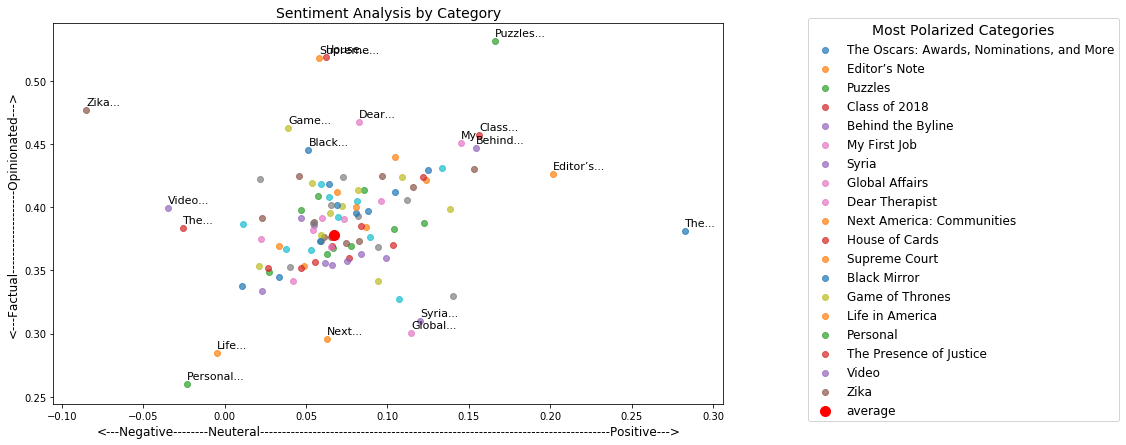

In [22]:
plt.rcParams['figure.figsize'] = [12, 7]

for row in df_cat.index:
    x = df_cat.iloc[[row]]['polarity'].values
    y = df_cat.iloc[[row]]['subjectivity'].values
    if x < 0 or x > 0.16 or y < 0.32 or y > 0.44:
        plt.scatter(x, y, label='{}'.format(df_cat['category'][row]), alpha=0.7)  
        plt.text(x + 0, y + 0.004, '{}...'.format(df_cat['category'][row].split()[0]), fontsize=11)
    else:
        plt.scatter(x, y, alpha=0.7)
    
    plt.title('Sentiment Analysis by Category', fontsize=14)
    plt.xlabel(
        '<---Negative--------Neuteral' + '-'*80 + 'Positive--->', fontsize=12
    )
    plt.ylabel('<---Factual-------------------Opinionated--->', fontsize=12)

plt.scatter(df['polarity'].mean(), df['subjectivity'].mean(), color='red', label='average', s=100)
plt.legend(
    title='Most Polarized Categories', title_fontsize=14, loc='upper right', 
    bbox_to_anchor=(1.6, 1.03),fontsize=12
)
plt.show()

The legend includes categories where the polarity is less than 0.04 or greather than 0.15, or the subjectivity is under 0.37 or over 0.5. Mostly I wanted to look at the outliers, to see which categories are more positive, negative, factual, or opinionated than the general trend.

#### Sentiment Analysis over time

Speaking of trends, I also want to take a look at how sentiment changes across different years.

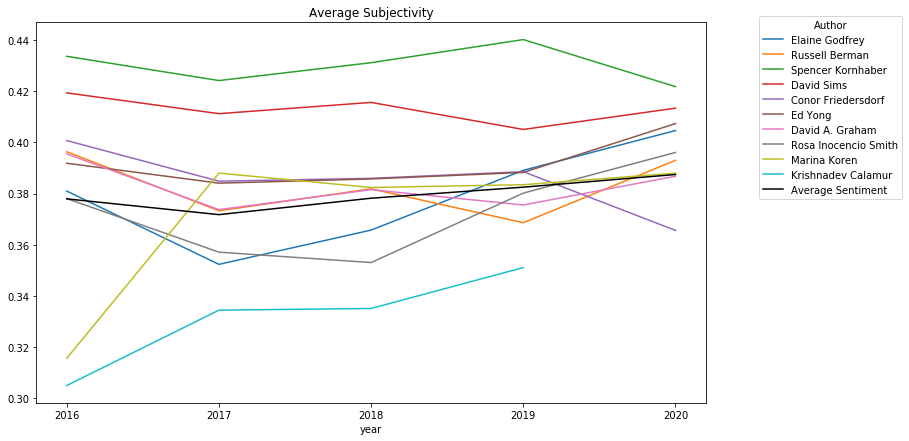

In [23]:
ay_dict = dict(df_authors.groupby(['author', 'year'])[['subjectivity', 'polarity']].mean())
METRIC = 'subjectivity'
#METRIC = 'polarity'
for author in df_authors['author'].unique():
    ay_dict[METRIC][author].plot(kind='line', label=author)
df.groupby('year')[METRIC].mean().plot(kind='line', label='Average Sentiment', color='black')
plt.plot()
plt.legend(title = 'Author', loc='upper right', bbox_to_anchor=(1.3, 1.03))
plt.xticks(np.arange(16, 21) + 2000)
plt.title('Average {}'.format(METRIC.capitalize()))
plt.show()

In [24]:
df_cat = df[df['category'].isin(list(df['category'].value_counts()[:10].index))]

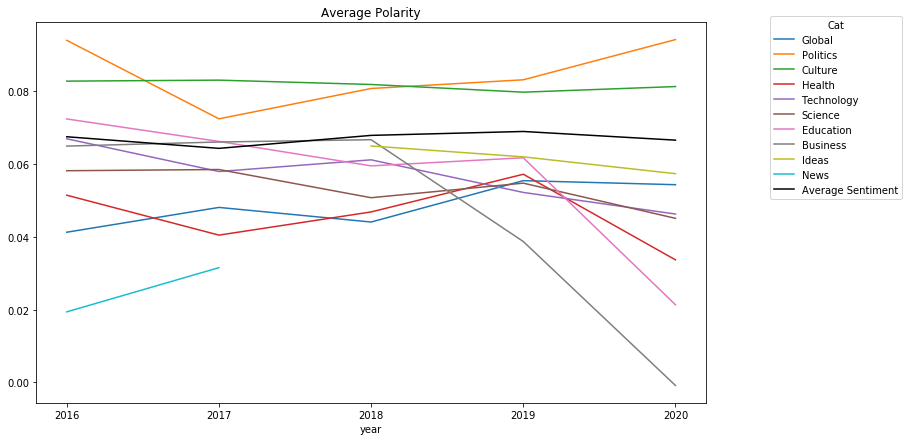

In [25]:
ay_dict = dict(df_cat.groupby(['category', 'year'])[['subjectivity', 'polarity']].mean())
METRIC = 'subjectivity'
METRIC = 'polarity'
for author in df_cat['category'].unique():
    ay_dict[METRIC][author].plot(kind='line', label=author)
df.groupby('year')[METRIC].mean().plot(kind='line', label='Average Sentiment', color='black')
plt.plot()
plt.legend(title = 'Cat', loc='upper right', bbox_to_anchor=(1.3, 1.03))
plt.xticks(np.arange(16, 21) + 2000)
plt.title('Average {}'.format(METRIC.capitalize()))
plt.show()

To a certain extent, it seems that most of the top authors' average polarity was closer to the average tone of the Atlantic in 2017-2019. It also appears that, overall, people have become slightly more opinionated over time.

Kornhaber has been the most consistent with respect to polarity.